# Projeto

## Classification

## Decision Trees Approach

In [2]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"

trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=113752 Test#=20000
Labels=[0.0, 1.0]


### Parameters Study Recall

Train#=113752 Test#=20000
Labels=[0.0, 1.0]
DT best with gini and d=82


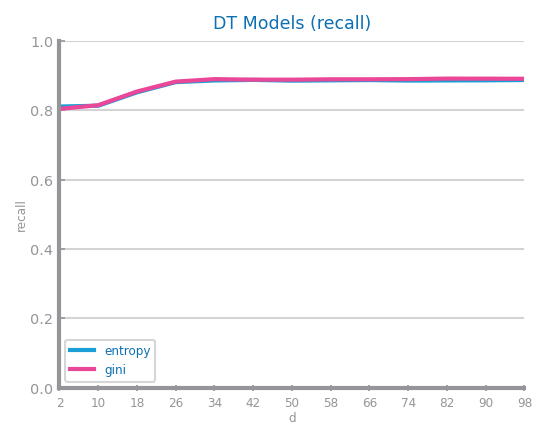

In [2]:
eval_metric = "recall"
trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = dslabs.trees_study(trnX, trnY, tstX, tstY, d_max=100, metric=eval_metric)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{eval_metric}_study.png')
show()

### Best Model Performance Recall

<Figure size 600x450 with 0 Axes>

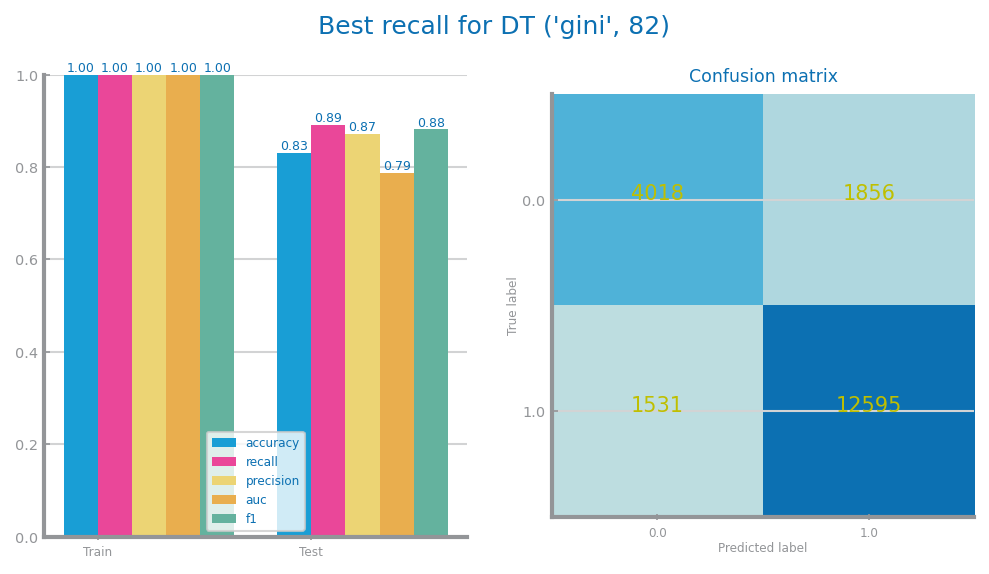

In [3]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### Parameters Study Precision

Train#=113752 Test#=20000
Labels=[0.0, 1.0]
DT best with gini and d=18


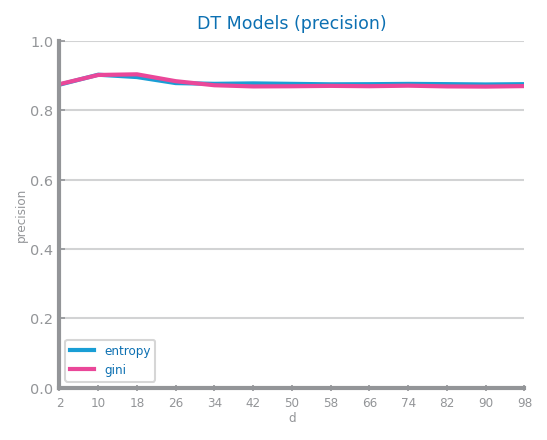

In [3]:
eval_metric = "precision"
trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(train_filename, test_filename, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = dslabs.trees_study(trnX, trnY, tstX, tstY, d_max=100, metric=eval_metric)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{eval_metric}_study.png')
show()

### Best Model Performance Precision

<Figure size 600x450 with 0 Axes>

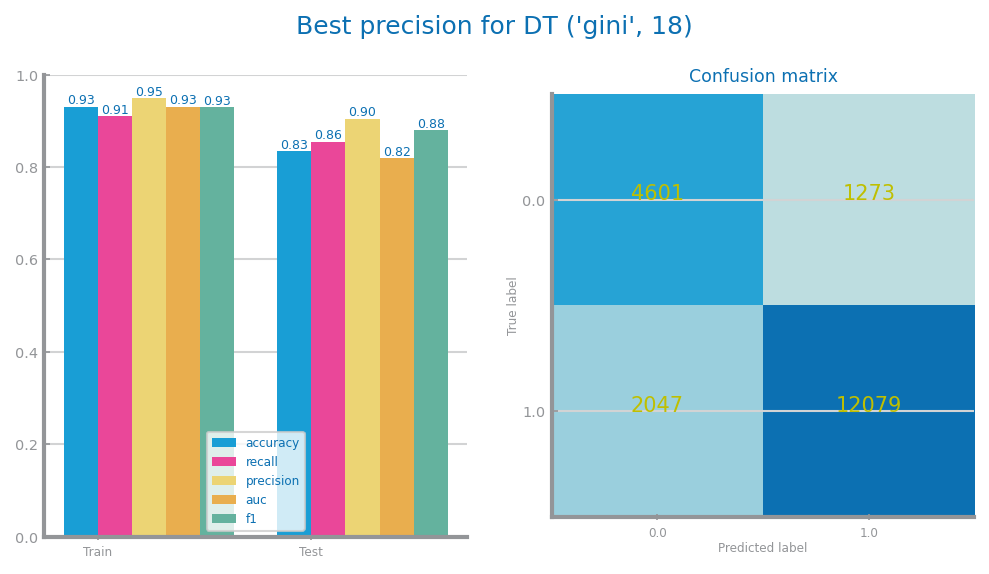

In [5]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/decision_tree/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### Variables Importance

In [10]:
import os
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis
from subprocess import call

tree_filename: str = f"C:/Users/franc/Desktop/TECNICO/Cadeiras/1_semestre/2Periodo/CD/Projeto/CD_IST/dataset_services/classification_images/decision_tree/{file_tag}_dt_{eval_metric}_best_tree"

max_depth2show = 3
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)

print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir())
print("Command:", ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"])

# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)

figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
axis("off")
show()

SyntaxError: positional argument follows keyword argument (586594970.py, line 22)

### Simple version of the tree

In [ ]:
from sklearn.tree import plot_tree

figure(figsize=(14, 6))
plot_tree(
    best_model,
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)

filename = f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_best_tree_simplified"
savefig(filename + ".png")

### Importance of Each Variable in the Discrimination

In [ ]:
from numpy import argsort
from dslabs_functions import plot_horizontal_bar_chart

importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_vars_ranking.png")

### Overfitting Study

*entropia entra sempre independentemente do melhor model oconsiderar mais o recall ou precision*

{'name': 'DT', 'metric': 'precision', 'params': ('gini', 18)}
18


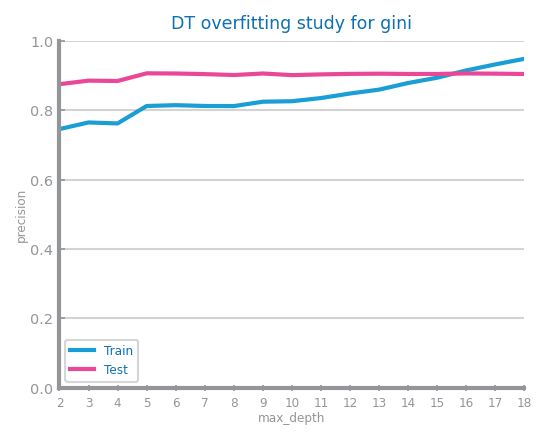

In [4]:
from typing import Literal
from numpy import array
from sklearn.tree import DecisionTreeClassifier
eval_metric="precision"
print(params)
crit: Literal["entropy", "gini"] = params["params"][0]
d_max = params["params"][1]
print(d_max)
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "precision"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
dslabs.plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/decision_tree/{file_tag}_dt_{eval_metric}_overfitting.png")